In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_url = "https://statso.io/wp-content/uploads/2024/02/user_profiles_for_ads.csv"
df = pd.read_csv(data_url)
#df.to_csv('../data/raw/user_profiles_for_ads.csv', index=False)

In [3]:
df.head(10)

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."
5,6,25-34,Female,Suburban,Hindi,Master,6203,257,Mobile + Desktop,3.8,3.3,0.209,0.048,44,100k+,"Gourmet Cooking, Software Engineering, Eco-Fri..."
6,7,18-24,Female,Suburban,Hindi,Bachelor,1573,136,Mobile + Desktop,2.8,7.9,0.172,0.068,8,100k+,"Gardening, Digital Marketing, Music Production"
7,8,55-64,Male,Suburban,Hindi,PhD,3343,272,Desktop Only,2.7,1.9,0.128,0.032,35,40k-60k,"Music Production, Photography, Gaming, Travel ..."
8,9,45-54,Female,Urban,Spanish,High School,2281,49,Mobile + Desktop,1.0,3.2,0.115,0.008,159,20k-40k,"Eco-Friendly Living, Gardening"
9,10,45-54,Male,Rural,Hindi,Bachelor,9741,421,Mobile + Desktop,2.3,4.4,0.161,0.058,157,100k+,"Digital Marketing, Travel and Adventure"


In [4]:
df['Top Interests'].iloc[4]

'Fitness and Wellness, Investing and Finance, Gardening, Music Production'

In [5]:
# Check for missing values
df.isna().sum()

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

## Exploratory Data Analysis (EDA)

##### User Demographics and Online Behavior Analysis

In [6]:
data = df.copy()

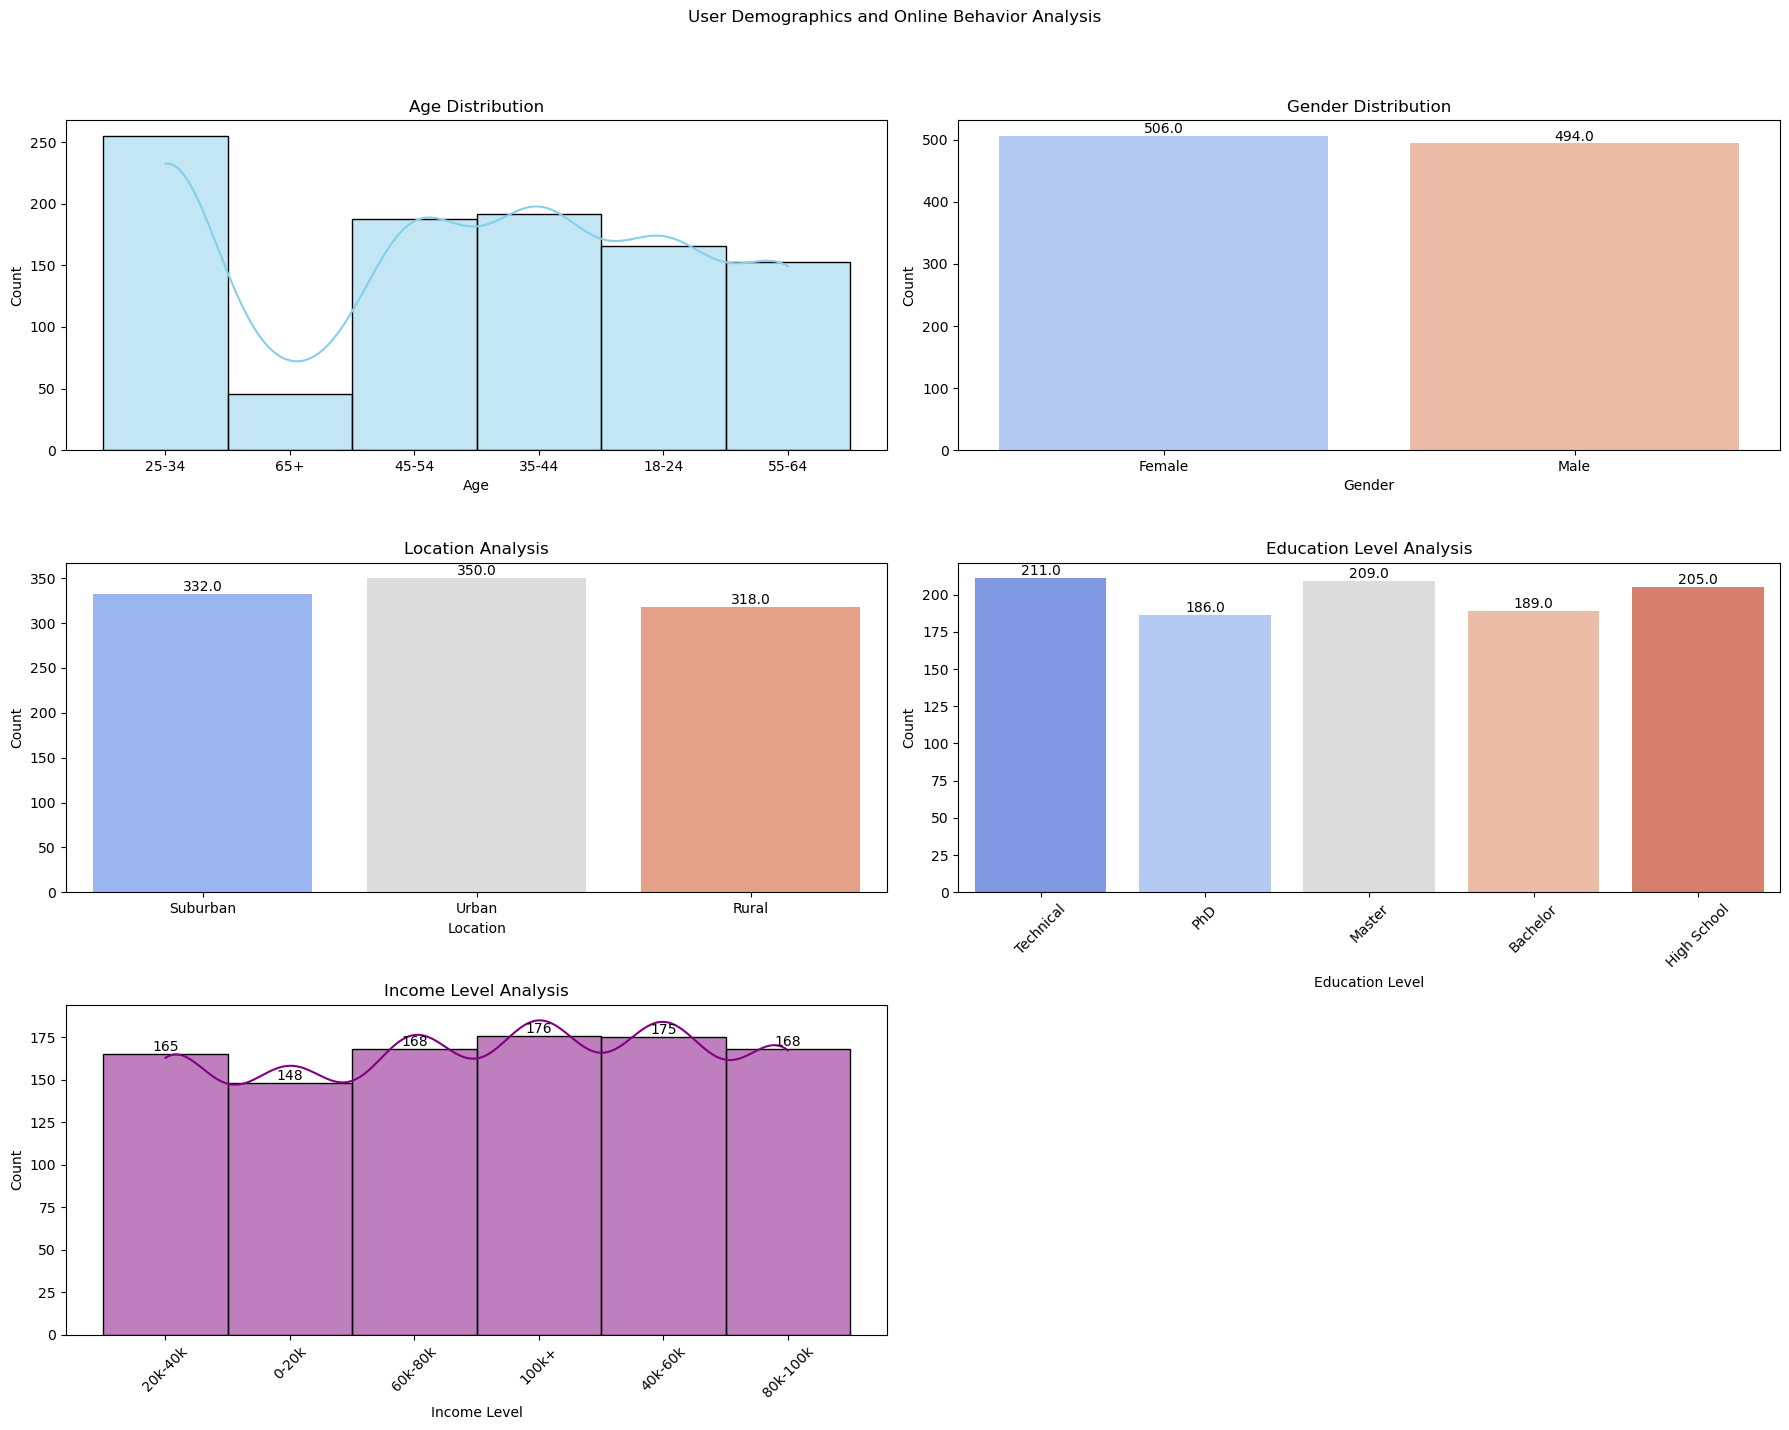

In [7]:
# Creating subplots for user demographics and online behavior analysis
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Demographics and Online Behavior Analysis')

# Age distribution
sns.histplot(ax=axes[0, 0], data=data, x='Age', bins=10, kde=True, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Gender distribution
sns.countplot(ax=axes[0, 1], data=data, x='Gender', palette='coolwarm')
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
# Add count labels on top of each bar
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Location analysis
sns.countplot(ax=axes[1, 0], data=data, x='Location', palette='coolwarm')
axes[1, 0].set_title('Location Analysis')
axes[1, 0].set_xlabel('Location')
axes[1, 0].set_ylabel('Count')
# Add count labels on top of each bar
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Education level analysis
sns.countplot(ax=axes[1, 1], data=data, x='Education Level', palette='coolwarm')
axes[1, 1].set_title('Education Level Analysis')
axes[1, 1].set_xlabel('Education Level')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
# Add count labels on top of each bar
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Income level analysis
sns.histplot(ax=axes[2, 0], data=data, x='Income Level', bins=10, kde=True, color='purple')
axes[2, 0].set_title('Income Level Analysis')
axes[2, 0].set_xlabel('Income Level')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)
# Add count labels on top of each bar
for p in axes[2, 0].patches:
    axes[2, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [8]:
demographics_columns = ['Age', 'Gender', 'Location', 'Education Level', 'Income Level']
for item in demographics_columns:
    print(df[item].value_counts())
    print('\n')

Age
25-34    255
35-44    192
45-54    188
18-24    166
55-64    153
65+       46
Name: count, dtype: int64


Gender
Female    506
Male      494
Name: count, dtype: int64


Location
Urban       350
Suburban    332
Rural       318
Name: count, dtype: int64


Education Level
Technical      211
Master         209
High School    205
Bachelor       189
PhD            186
Name: count, dtype: int64


Income Level
100k+       176
40k-60k     175
60k-80k     168
80k-100k    168
20k-40k     165
0-20k       148
Name: count, dtype: int64




**User Demographics**

- **Age:** The user base skews slightly younger, with the largest group falling within the 25-34 age range (255 users). This is followed by the 35-44 (192 users) and 45-54 (188 users) age groups. Teenagers (18-24) and users above 55 are less represented (166 and 153 users respectively).

- **Gender:** The gender distribution is relatively balanced, with a slight majority of females (506) compared to males (494).

- **Location:** Geographically, the user base seems evenly distributed across urban (350 users), suburban (332 users), and rural (318 users) areas.

- **Education Level:** A significant portion of users hold advanced degrees (Master's - 209 users, PhD - 186 users). Technical degrees (211 users) and Bachelor's degrees (189 users) are also well-represented. High school graduates (205 users) form the remaining segment.

- **Income Level:** The income distribution suggests a user base with moderate to high purchasing power. The largest group falls within the 40k-60k and 60k-80k income brackets (175 and 168 users respectively). A sizeable portion also earns above 100k annually (176 users). While income levels decrease at the lower and higher ends of the spectrum (20k-40k: 165 users, 0-20k: 148 users), they still hold a presence.

##### Online Behavior Exploration

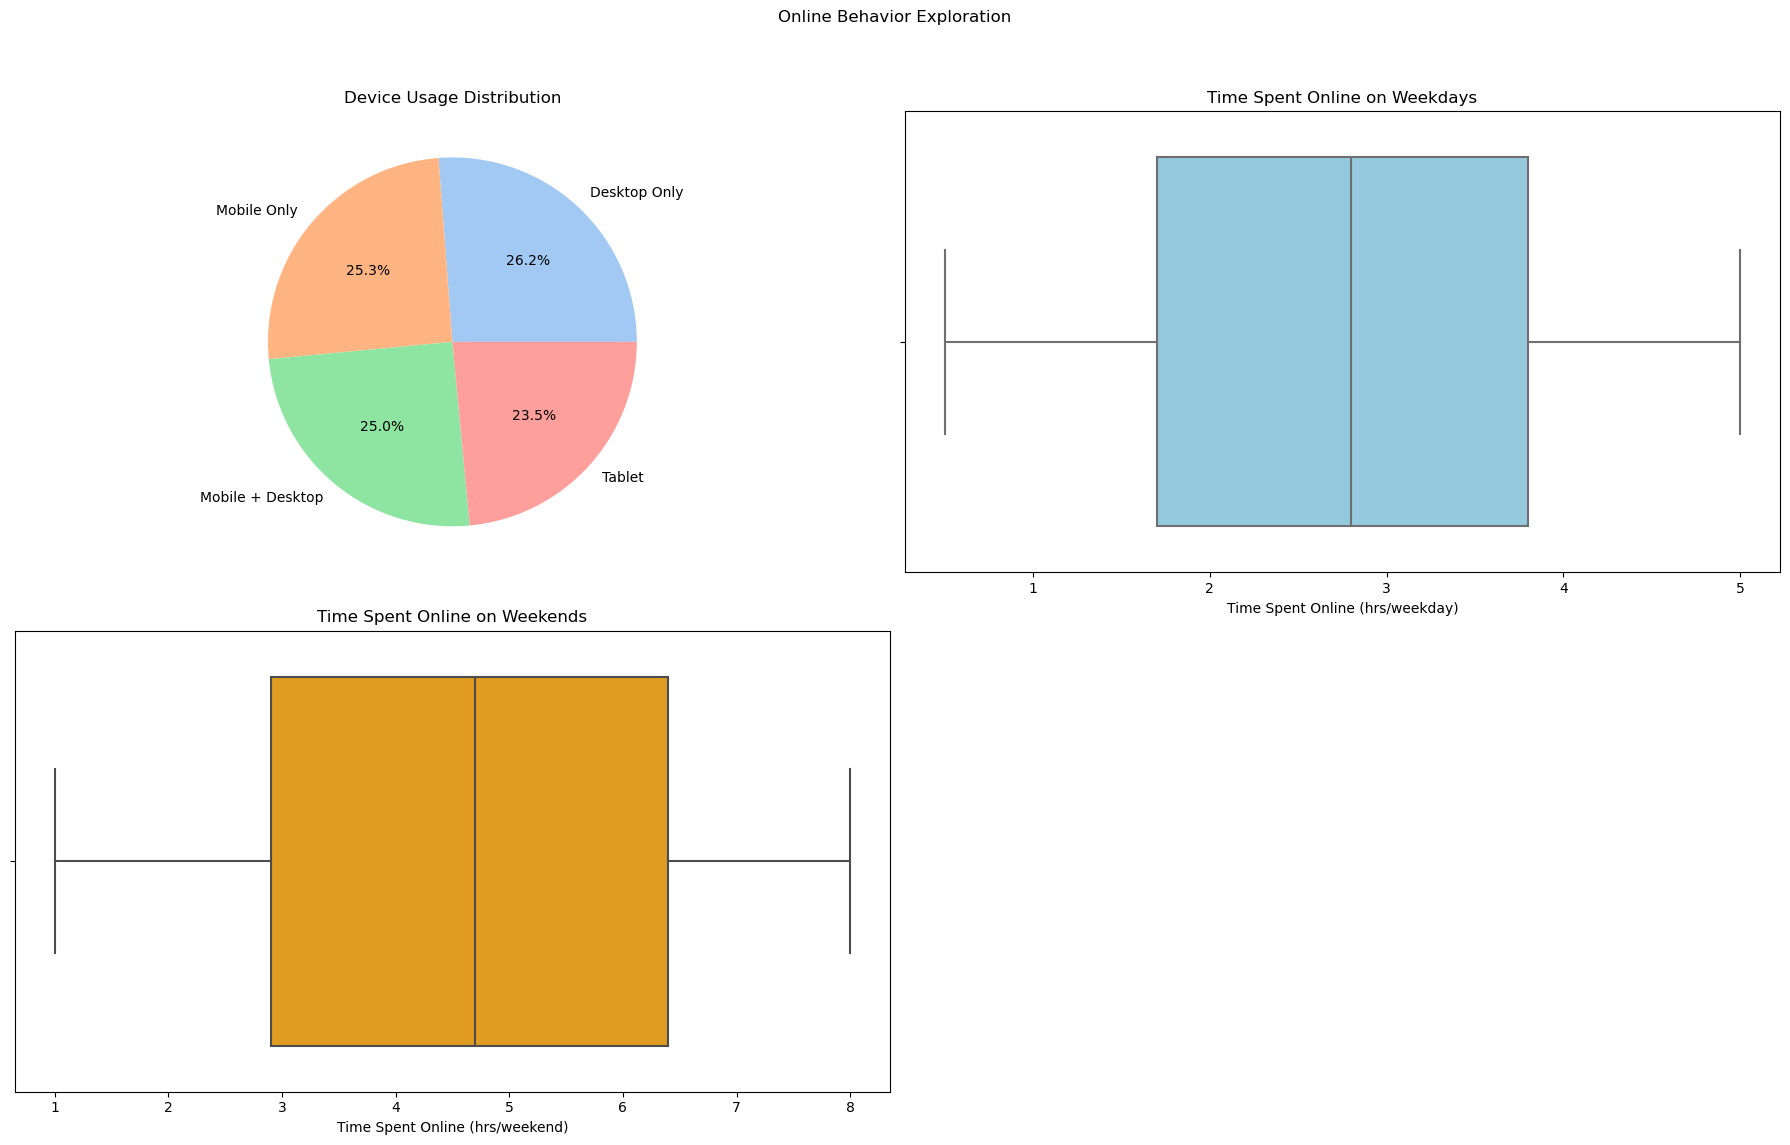

In [9]:
# Creating subplots for online behavior exploration
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Online Behavior Exploration')

# Device Usage Analysis
device_counts = data['Device Usage'].value_counts()
axes[0, 0].pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[0, 0].set_title('Device Usage Distribution')

# Time Spent Online on Weekdays
sns.boxplot(ax=axes[0, 1], x='Time Spent Online (hrs/weekday)', data=data, color='skyblue')
axes[0, 1].set_title('Time Spent Online on Weekdays')

# Time Spent Online on Weekends
sns.boxplot(ax=axes[1, 0], x='Time Spent Online (hrs/weekend)', data=data, color='orange')
axes[1, 0].set_title('Time Spent Online on Weekends')

# Remove the empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [10]:
df[['Device Usage', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)']].describe()

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend)
count,1000.000000,1000.000000
mean,2.757500,4.601600
std,1.279735,2.026234
min,0.500000,1.000000
25%,1.700000,2.900000
50%,2.800000,4.700000
75%,3.800000,6.400000
max,5.000000,8.000000


In [11]:
df['Device Usage'].value_counts(normalize=True)

Device Usage
Desktop Only        0.262
Mobile Only         0.253
Mobile + Desktop    0.250
Tablet              0.235
Name: proportion, dtype: float64

**Online Behavior Exploration**

- **Device Usage Distribution:** The pie chart illustrates the distribution of users across different device categories. It reveals that the user base is fairly evenly split among desktop-only, mobile-only, and a combination of mobile and desktop devices, each representing approximately a quarter of the total users. Tablet usage is slightly less common, with around 23.5% of users accessing the platform through this device.

- **Time Spent Online Analysis:** The box plots display the distribution of time spent online by users on both weekdays and weekends. For weekdays, the median time spent online is approximately 2.8 hours, with a relatively narrow interquartile range (IQR) from 1.7 to 3.8 hours. On weekends, users tend to spend more time online, with a median of 4.7 hours and a wider IQR from 2.9 to 6.4 hours. The plots highlight the variability in online behavior between weekdays and weekends, with users generally spending more time online during leisure periods.

##### User Interaction Analysis

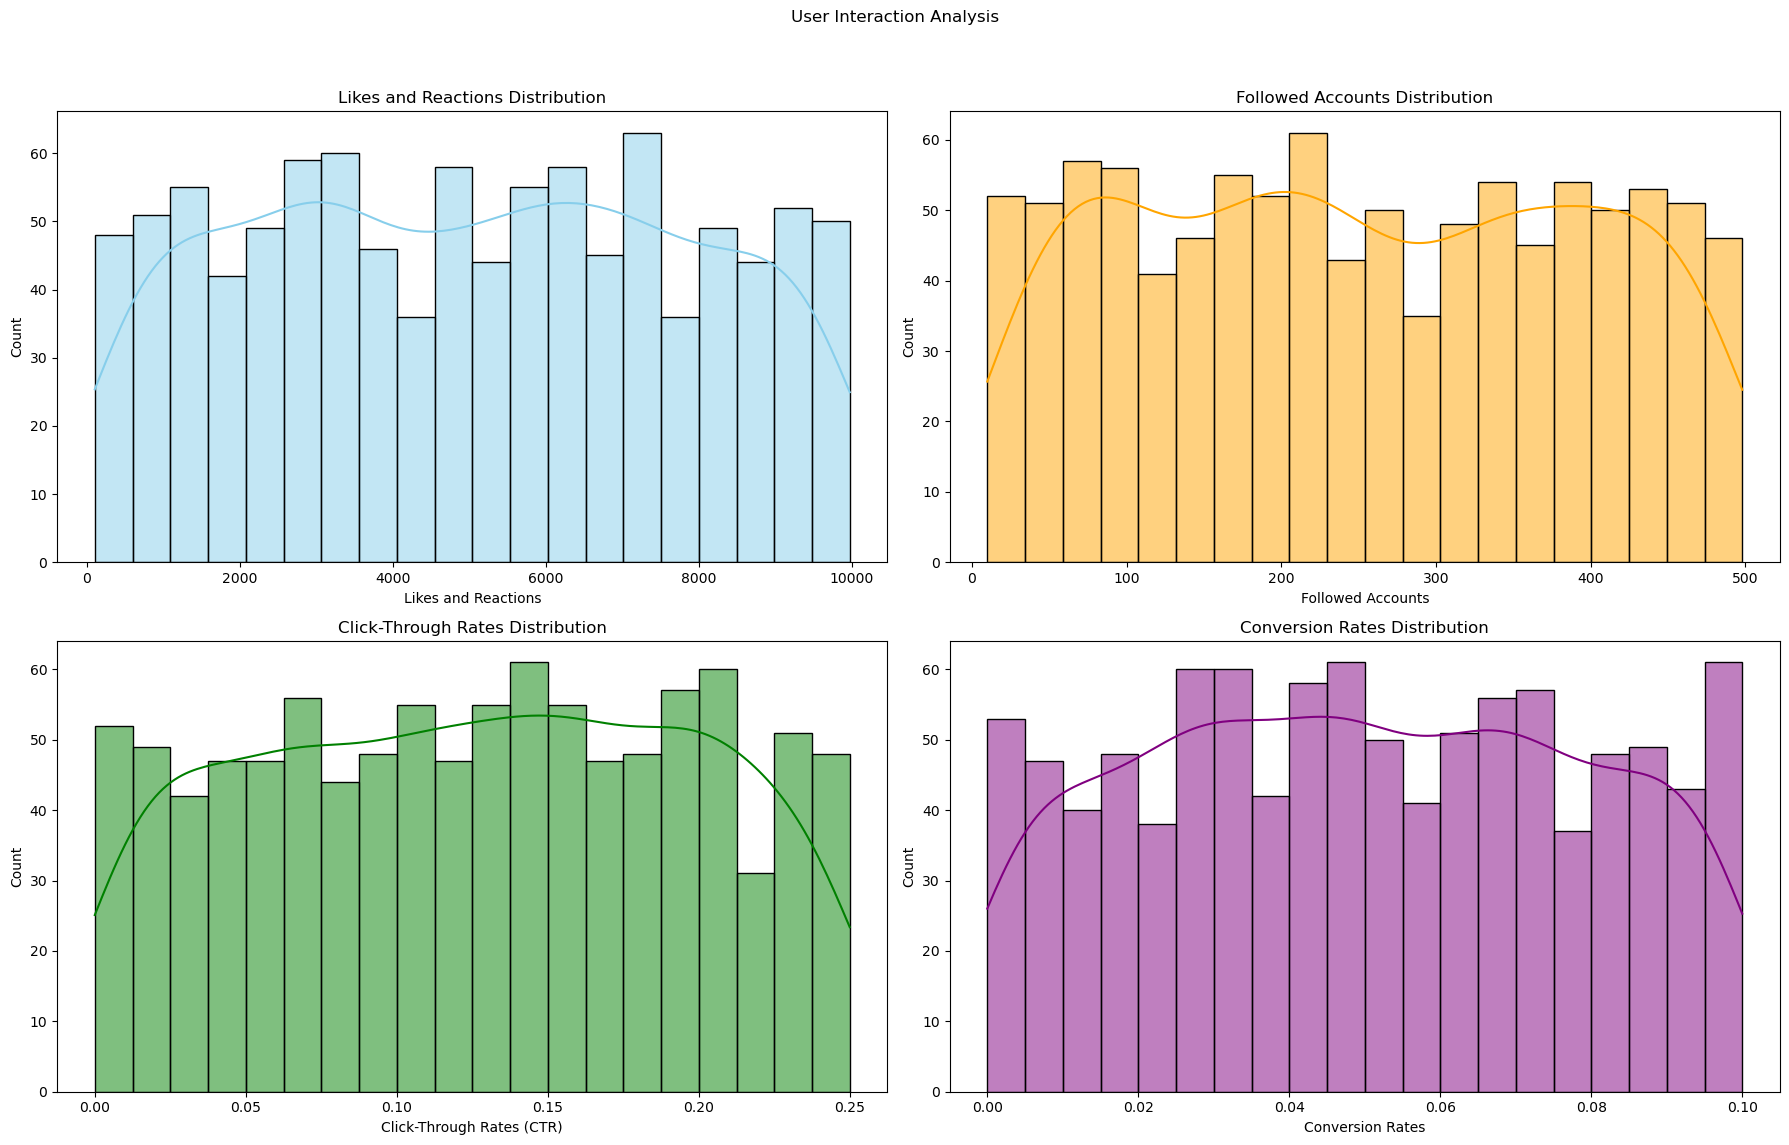

In [12]:
# Creating subplots for user interaction analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('User Interaction Analysis')

# Likes and Reactions Analysis
sns.histplot(ax=axes[0, 0], x='Likes and Reactions', data=data, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Likes and Reactions Distribution')
axes[0, 0].set_xlabel('Likes and Reactions')
axes[0, 0].set_ylabel('Count')

# Followed Accounts Analysis
sns.histplot(ax=axes[0, 1], x='Followed Accounts', data=data, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Followed Accounts Distribution')
axes[0, 1].set_xlabel('Followed Accounts')
axes[0, 1].set_ylabel('Count')

# Click-Through Rate Analysis
sns.histplot(ax=axes[1, 0], x='Click-Through Rates (CTR)', data=data, bins=20, kde=True, color='green')
axes[1, 0].set_title('Click-Through Rates Distribution')
axes[1, 0].set_xlabel('Click-Through Rates (CTR)')
axes[1, 0].set_ylabel('Count')

# Conversion Rate Analysis
sns.histplot(ax=axes[1, 1], x='Conversion Rates', data=data, bins=20, kde=True, color='purple')
axes[1, 1].set_title('Conversion Rates Distribution')
axes[1, 1].set_xlabel('Conversion Rates')
axes[1, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
user_interaction_columns = ['Likes and Reactions', 'Followed Accounts', 'Click-Through Rates (CTR)', 'Conversion Rates']
user_interaction_stats = {}
for column in user_interaction_columns:
    user_interaction_stats[column] = {
        'mean': data[column].mean(),
        'median': data[column].median(),
        'std': data[column].std()
    }

user_interaction_stats

{'Likes and Reactions': {'mean': 4997.084,
  'median': 5002.5,
  'std': 2838.494365188208},
 'Followed Accounts': {'mean': 251.438,
  'median': 245.5,
  'std': 141.94155685197188},
 'Click-Through Rates (CTR)': {'mean': 0.125333,
  'median': 0.128,
  'std': 0.0711871316932963},
 'Conversion Rates': {'mean': 0.04980500000000001,
  'median': 0.049,
  'std': 0.0286701055099201}}

**User Interaction**

- **Likes and Reactions:** The distribution of Likes and Reactions appears to be somewhat right-skewed, with a median of 5002.5 and a mean slightly higher (4997.08). This suggests that a larger portion of users generate a moderate to high number of Likes and Reactions, while there might be a smaller group with exceptionally high engagement. The standard deviation (2838.49) indicates a fair amount of variability in user behavior.

- **Followed Accounts:** The distribution of Followed Accounts also seems right-skewed, with a median of 245.5 and a slightly higher mean (251.44). This implies that most users follow a moderate number of accounts, while some follow a significantly higher number. The standard deviation (141.94) reflects some variation in user behavior regarding following accounts.

- **Click-Through Rates (CTR):** The Click-Through Rate (CTR) distribution is likely centered around the median (0.128) with a standard deviation (0.0712). This suggests that a majority of users exhibit click-through behavior within a specific range. However, the presence of a tail on either side of the distribution indicates that some users might have very low or very high CTRs.

- **Conversion Rates:** Similar to CTR, the Conversion Rate distribution is likely centered around the median (0.049) with a standard deviation (0.0287). This implies that most users fall within a specific conversion rate range. However, as with CTR, there might be users with exceptionally low or high conversion rates.

##### Text Analysis Exploration

In [14]:
def plot_top_n_interests(data, n=10):
    """
    Plots the top N interests as vertical bars.
    
    Parameters:
        data (DataFrame): DataFrame containing the 'Top Interests' column.
        n (int): Number of top interests to plot (default is 10).
    """
    # Splitting the 'Top Interests' column and creating a list of all interests
    interests_list = data['Top Interests'].str.split(', ').sum()

    # Counting the frequency of each interest
    interests_counter = Counter(interests_list)

    # Creating a DataFrame for easier plotting
    interests_df = pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # Selecting the top N interests
    top_interests = interests_df.head(n)

    # Plotting the top N interests using Plotly Express
    fig = px.bar(top_interests, x='Interest', y='Frequency', title=f'Top {n} User Interests', 
                 labels={'Frequency': 'Frequency', 'Interest': 'Interest'})
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()

plot_top_n_interests(data, n=15)

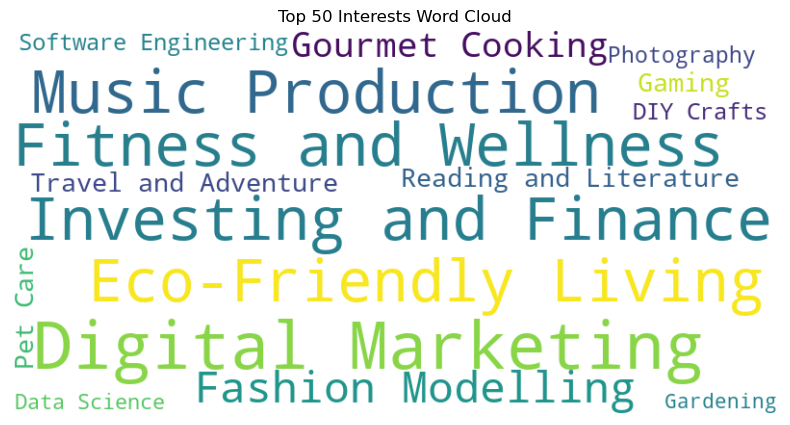

In [15]:
def generate_word_cloud(data, n=50):
    """
    Generates a word cloud based on the top N interests.
    
    Parameters:
        data (DataFrame): DataFrame containing the 'Top Interests' column.
        n (int): Number of top interests to include in the word cloud (default is 50).
    """
    # Splitting the 'Top Interests' column and creating a list of all interests
    interests_list = data['Top Interests'].str.split(', ').sum()

    # Counting the frequency of each interest
    interests_counter = Counter(interests_list)

    # Selecting the top N interests
    top_interests = dict(sorted(interests_counter.items(), key=lambda item: item[1], reverse=True)[:n])

    # Generating the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_interests)

    # Displaying the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top {n} Interests Word Cloud')
    plt.axis('off')
    plt.show()

# Example usage:
generate_word_cloud(data, n=50)